In [13]:
import pandas as pd

# Data Collection

In [14]:
data = pd.read_csv("../data/housing.csv")

In [68]:
data.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17599,-118.15,34.09,52.0,2203.0,430.0,1238.0,403.0,4.4306,225800.0,<1H OCEAN,3


# EDA

Option 01: manual EDA

Option 02: Automated EDA

In [16]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(data, title="Housing Data Profiling Report")
profile.to_file("Housing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
import dtale

d = dtale.show(data)
d.open_browser()

# Create Train and Test Set

In [20]:
from sklearn.model_selection import train_test_split

# Randomly split the data into training and test sets
train, test = train_test_split(data, test_size=0.2, random_state=12312)

print(train.shape)
print(test.shape)

(16512, 10)
(4128, 10)


In [21]:
data["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [22]:
import numpy as np

bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf]

data["income_cat"] = pd.cut(data["median_income"], bins, labels=[1, 2, 3, 4, 5])

In [23]:
data[["median_income", "income_cat"]].sample(10)

,median_income,income_cat
12983,7.7684,5
7889,5.3468,4
6327,1.2668,1
8253,2.9926,2
321,5.9175,4
7772,5.9378,4
19181,6.2350,5
10380,4.5066,4
10222,4.0900,3
14221,2.2656,2


In [24]:
assert len(data["income_cat"]) == len(data)

In [25]:
data["income_cat"].value_counts() / len(data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [26]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=12312)
strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, random_state=12312, stratify=data["income_cat"]
)

In [27]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


income_cat_proportions(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


compare_props = pd.DataFrame(
    {
        "Overall": income_cat_proportions(data),
        "Stratified": income_cat_proportions(strat_test_set),
        "Random": income_cat_proportions(test_set),
    }
).sort_index()

compare_props["Rand. %error"] = (
    100 * compare_props["Random"] / compare_props["Overall"] - 100
)
compare_props["Strat. %error"] = (
    100 * compare_props["Stratified"] / compare_props["Overall"] - 100
)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040940,2.798054,0.364964
2,0.318847,0.318798,0.312500,-1.990579,-0.015195
3,0.350581,0.350533,0.362645,3.441128,-0.013820
4,0.176308,0.176357,0.169331,-3.957131,0.027480
5,0.114438,0.114341,0.114583,0.127011,-0.084674


In [29]:
housing = strat_train_set.drop("income_cat", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

housing = strat_train_set.drop("median_house_value", axis=1)

print(housing.shape)
print(housing_labels.shape)

(16512, 10)
(16512,)


# Data Cleaning

## Missing value handling

In [30]:
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

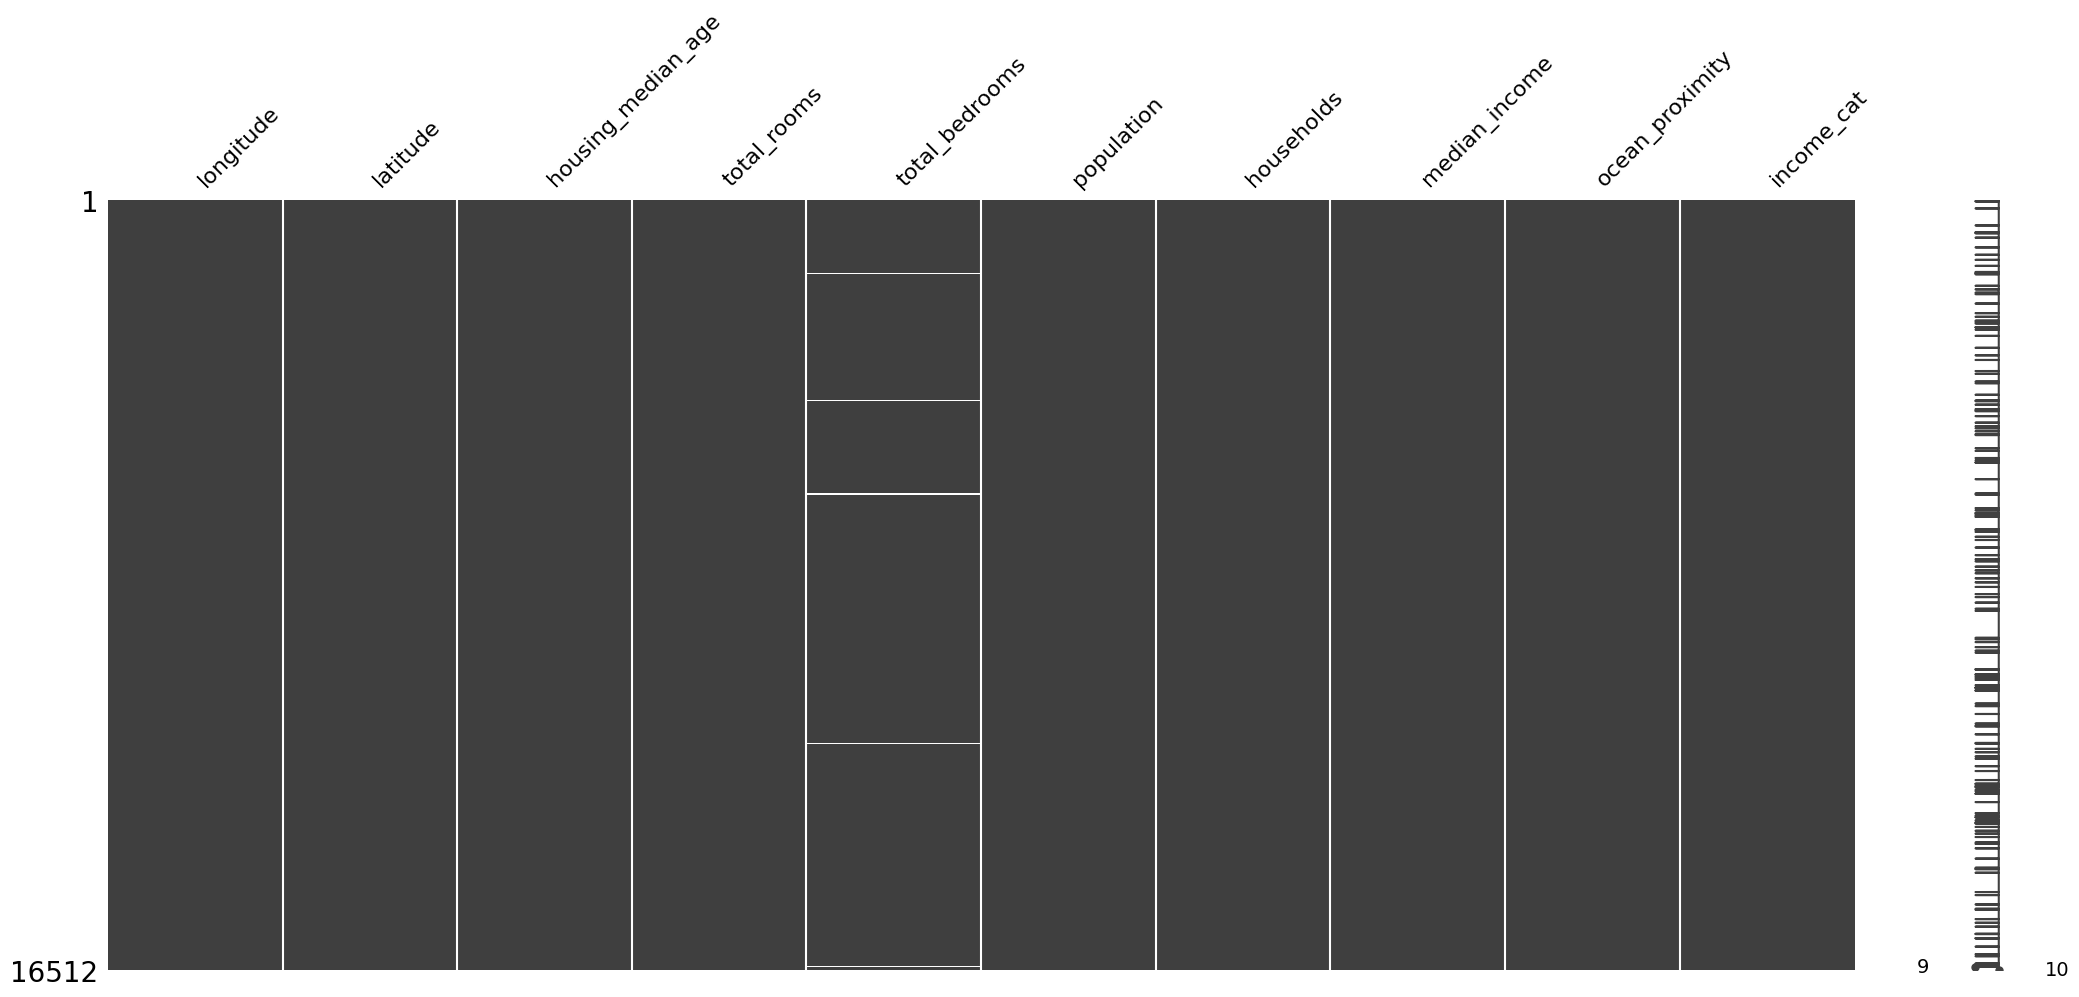

In [31]:
msno.matrix(housing)
plt.show()

In [32]:
housing["total_bedrooms"].describe()

count    16338.000000
mean       536.202473
std        419.913671
min          1.000000
25%        295.000000
50%        434.000000
75%        644.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [33]:
housing.isnull().any(axis=1).sum()

174

In [34]:
housing[housing.isnull().any(axis=1)].sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
16273,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,NEAR BAY,5
1835,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,4
14938,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,<1H OCEAN,2
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND,2
7999,-120.93,37.73,14.0,2799.0,NaN,2294.0,596.0,2.6343,INLAND,2
4919,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,INLAND,3
13093,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,NEAR BAY,3
7709,-122.46,37.72,39.0,2254.0,NaN,1388.0,404.0,2.9688,NEAR OCEAN,2
8650,-118.18,34.04,42.0,1670.0,NaN,1997.0,452.0,2.7880,<1H OCEAN,2
15926,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,NEAR BAY,3


In [35]:
housing_num = housing.select_dtypes(include=[np.number])

housing_num.mean()

longitude             -119.577683
latitude                35.635805
housing_median_age      28.649346
total_rooms           2626.708152
total_bedrooms         536.202473
population            1423.349746
households             498.582728
median_income            3.867104
dtype: float64

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2122.    ,  434.    , 1164.    ,
        409.    ,    3.5377])

In [37]:
X = imputer.transform(housing_num)
X

array([[-1.1972e+02,  3.6320e+01,  4.0000e+01, ...,  6.7600e+02,
         2.5600e+02,  2.2721e+00],
       [-1.1814e+02,  3.4160e+01,  3.6000e+01, ...,  2.8460e+03,
         7.8400e+02,  2.6217e+00],
       [-1.1736e+02,  3.3880e+01,  1.5000e+01, ...,  1.3610e+03,
         3.8200e+02,  4.6875e+00],
       ...,
       [-1.1835e+02,  3.4220e+01,  1.9000e+01, ...,  3.9630e+03,
         1.5950e+03,  5.9970e+00],
       [-1.1837e+02,  3.3870e+01,  1.3000e+01, ...,  1.5730e+03,
         6.9400e+02,  3.5048e+00],
       [-1.1818e+02,  3.4030e+01,  4.0000e+01, ...,  2.9200e+03,
         6.7700e+02,  2.0764e+00]])

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr.loc[housing[housing.isnull().any(axis=1)].index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6380,-117.02,32.78,31.0,2567.0,434.0,1198.0,499.0,3.4659
8305,-118.19,33.98,36.0,4179.0,434.0,4582.0,1196.0,2.0087
5946,-119.68,36.79,16.0,1551.0,434.0,1010.0,292.0,3.5417
9030,-117.23,32.75,5.0,1824.0,434.0,892.0,426.0,3.4286
13862,-117.34,33.94,13.0,7910.0,434.0,3382.0,1176.0,5.5563
...,...,...,...,...,...,...,...,...
13093,-122.16,37.45,47.0,4234.0,434.0,1808.0,1093.0,4.2297
6563,-118.28,34.06,42.0,2472.0,434.0,3795.0,1179.0,1.2254
7434,-117.73,34.10,37.0,3457.0,434.0,1344.0,530.0,5.8891
495,-114.59,34.83,41.0,812.0,434.0,375.0,158.0,1.7083


In [39]:
housing_tr.isnull().any(axis=1).sum()

0

In [40]:
from sklearn.impute import SimpleImputer

# Select the numerical columns from the housing dataframe
housing_num = housing.select_dtypes(include=[np.number])

# Create an instance of SimpleImputer with median strategy
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the numerical columns
X = imputer.fit_transform(housing_num)

# Create a new dataframe with the imputed values
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Display the first few rows of the transformed dataframe
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7920,-119.72,36.32,40.0,1185.0,221.0,676.0,256.0,2.2721
16993,-118.14,34.16,36.0,2973.0,807.0,2846.0,784.0,2.6217
16589,-117.36,33.88,15.0,2857.0,421.0,1361.0,382.0,4.6875
15643,-122.00,37.33,30.0,4033.0,794.0,1788.0,807.0,5.6932
8697,-122.28,37.90,52.0,2261.0,328.0,819.0,335.0,4.9083


# Feature Scaling

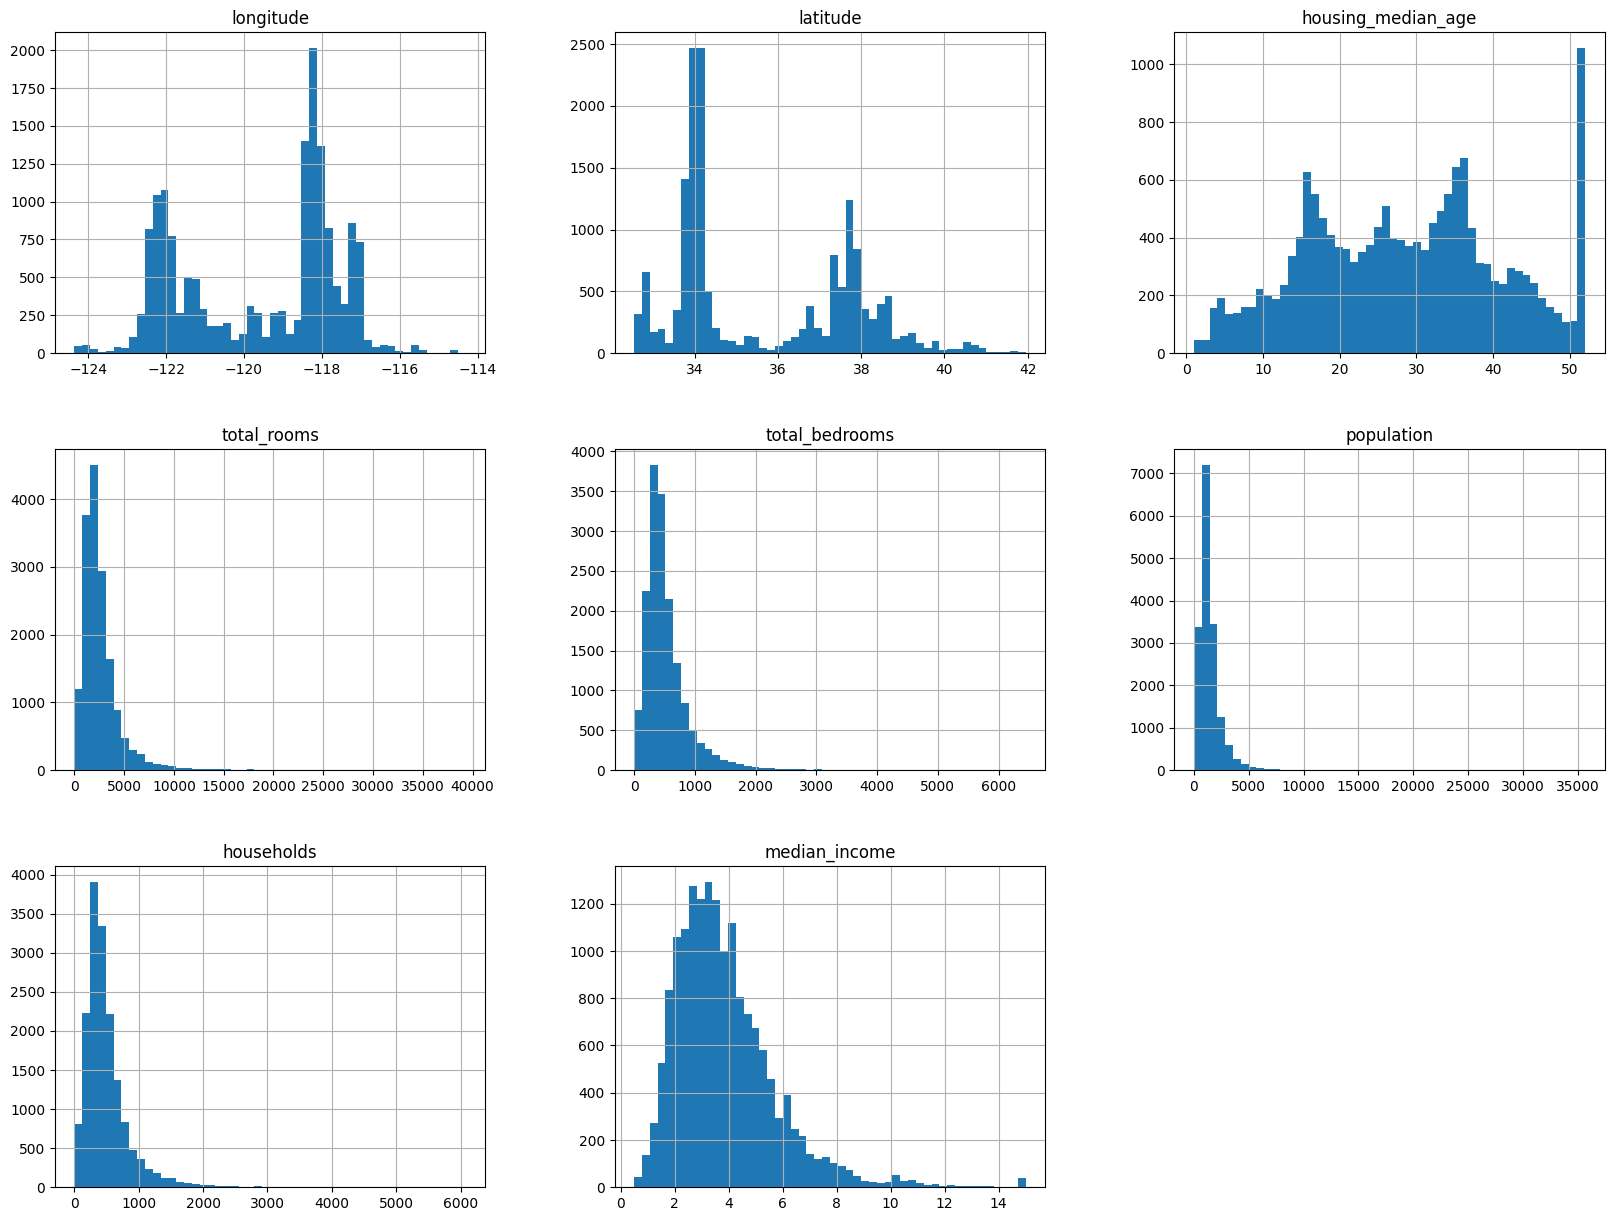

In [41]:
housing_tr.hist(bins=50, figsize=(20, 15))
plt.show()

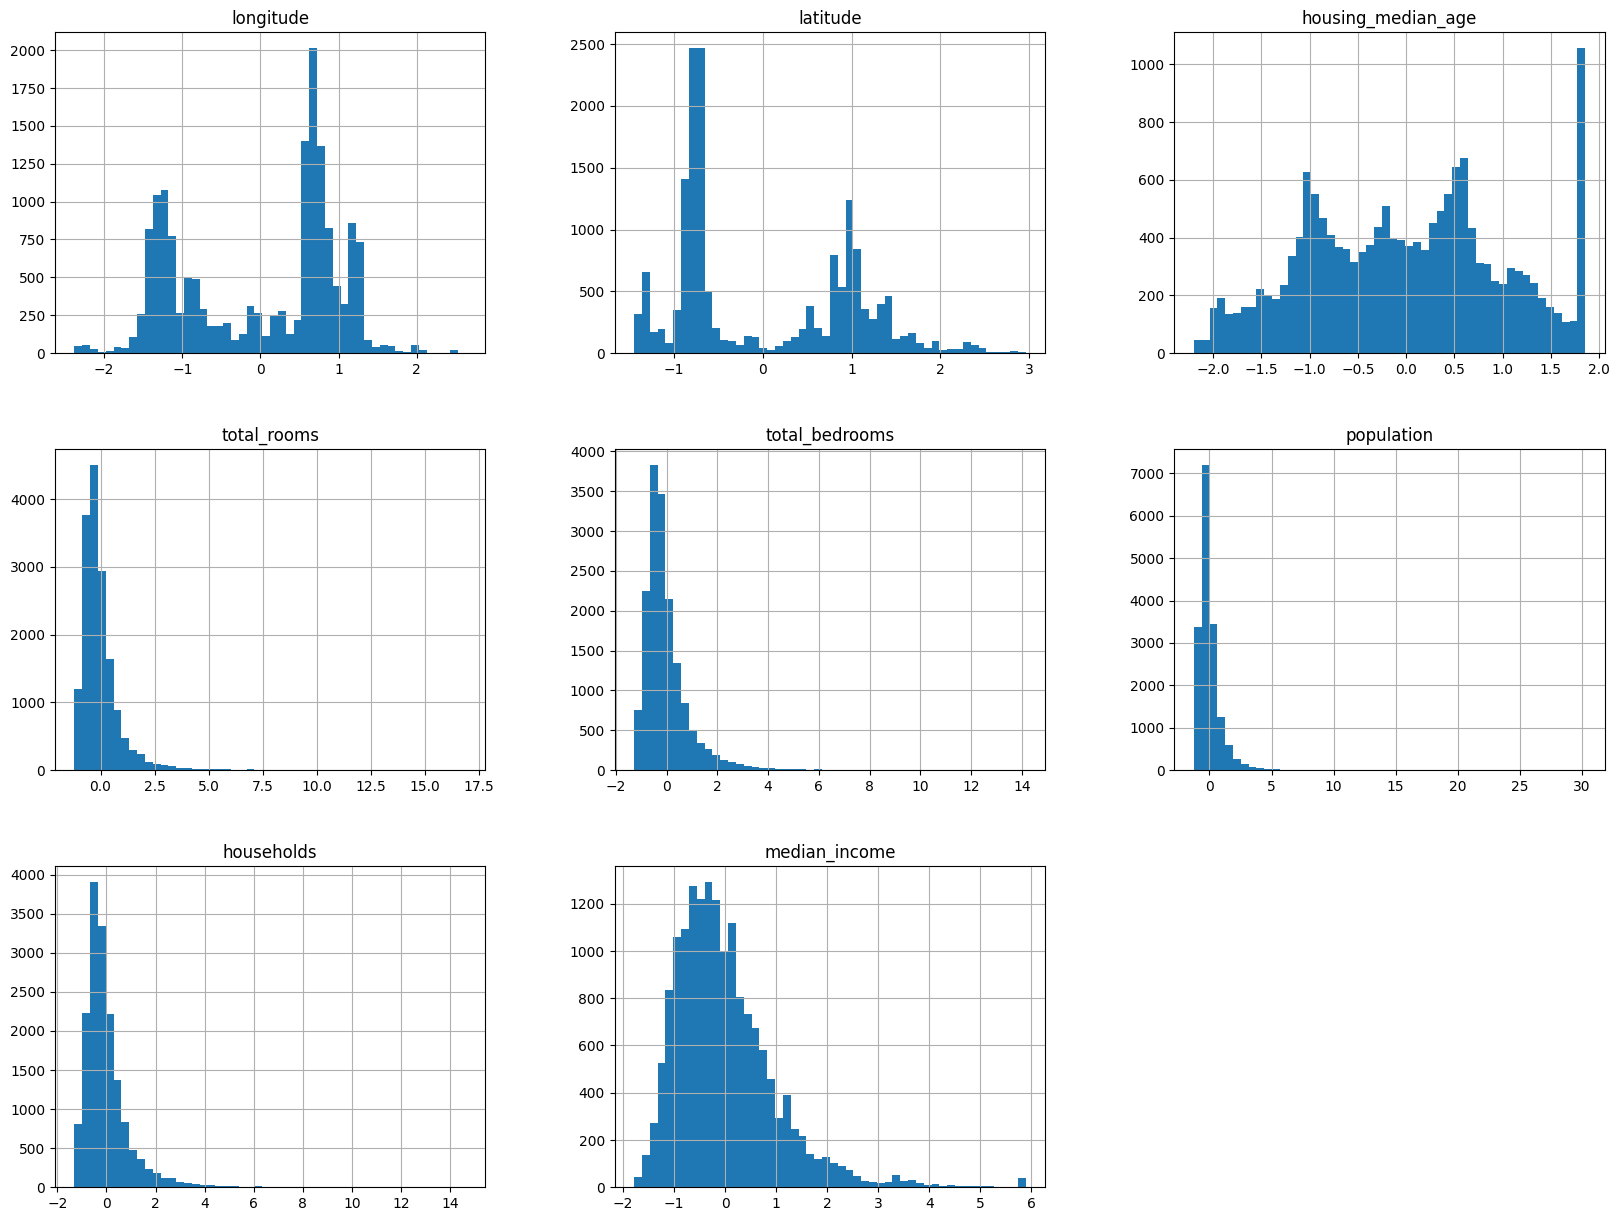

In [42]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_tr)
# type(housing_num_std_scaled)

housing_num_std_scaled_df = pd.DataFrame(
    housing_num_std_scaled, columns=housing_num.columns, index=housing_num.index
)

housing_num_std_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

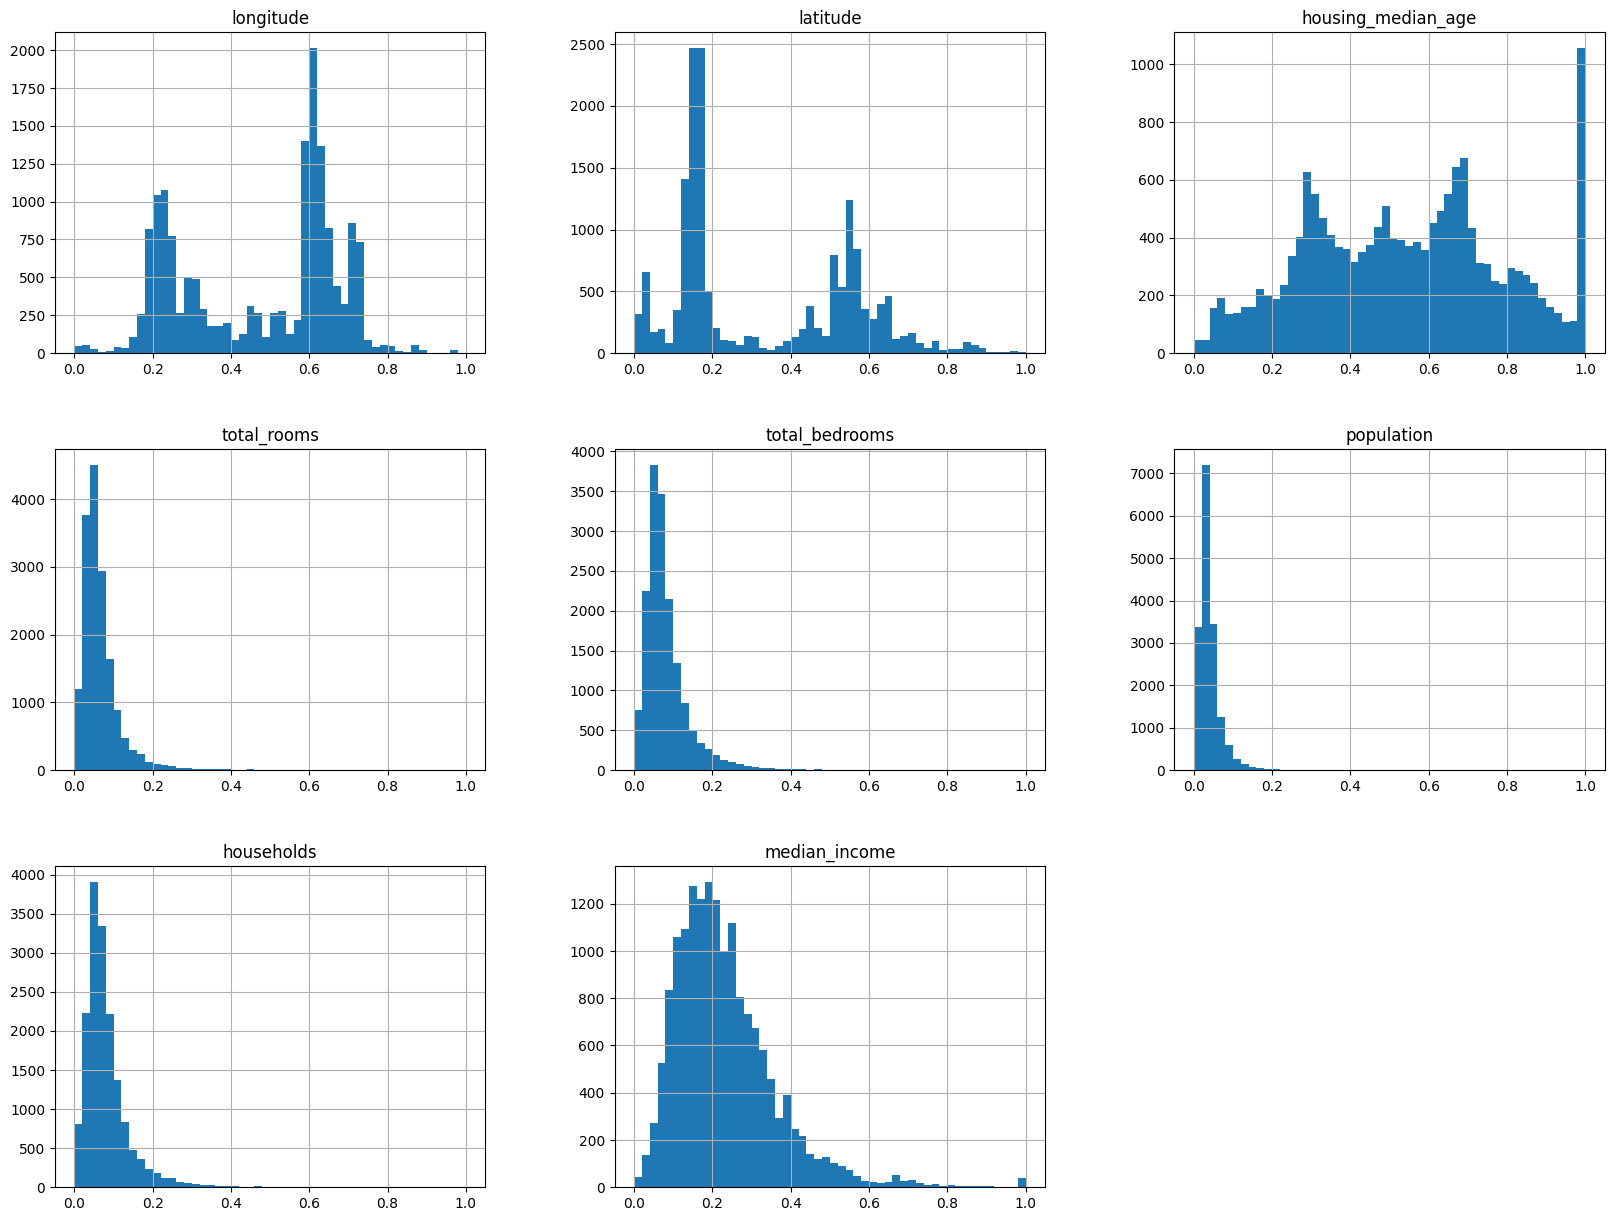

In [43]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_tr)
# type(housing_num_min_max_scaled)

housing_num_min_max_scaled_df = pd.DataFrame(
    housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index
)

housing_num_min_max_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Handling Categorical Variables

In [44]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
7920,INLAND
16993,<1H OCEAN
16589,INLAND
15643,<1H OCEAN
8697,NEAR BAY


In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
type(housing_cat_encoded)

housing_cat_encoded_df = pd.DataFrame(
    housing_cat_encoded, columns=housing_cat.columns, index=housing_cat.index
)

print(ordinal_encoder.categories_)

housing_cat_encoded_df.head()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,ocean_proximity
7920,1.0
16993,0.0
16589,1.0
15643,0.0
8697,3.0


## Homework: Apply One Hot Encoding

# Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn import set_config
set_config(display='diagram')

In [47]:
strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, random_state=12312, stratify=data["income_cat"]
)

In [48]:
housing_labels = strat_train_set['median_house_value'].copy()
test_labels = strat_test_set['median_house_value'].copy()

housing = strat_train_set.drop(['median_house_value', 'income_cat'], axis=1)
test_set = strat_test_set.drop(['median_house_value', 'income_cat'], axis=1)

In [49]:
num_attributes = housing.select_dtypes(include=[np.number]).columns.tolist()
cat_attributes = housing.select_dtypes(include=['object']).columns.tolist()

In [50]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

In [51]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])

In [52]:
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('lin_reg', LinearRegression())
])

lin_reg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('lin_reg', LinearRegression())])

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('tree_reg', DecisionTreeRegressor())
])

tree_reg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_reg', DecisionTreeRegressor())])

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('forest_reg', RandomForestRegressor())
])

forest_reg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg', RandomForestRegressor())])

In [56]:
lin_model = lin_reg_pipeline.fit(housing, housing_labels)
tree_model = tree_reg_pipeline.fit(housing, housing_labels)
random_forest_model = forest_reg_pipeline.fit(housing, housing_labels)

In [57]:
lin_predicted_labels = lin_model.predict(test_set)
tree_predicted_labels = tree_model.predict(test_set)
random_forest_predicted_labels = random_forest_model.predict(test_set)

In [58]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(test_labels, lin_predicted_labels)
tree_rmse = root_mean_squared_error(test_labels, tree_predicted_labels)
random_forest_rmse = root_mean_squared_error(test_labels, random_forest_predicted_labels)

In [59]:
print(f'lin_rmse: {lin_rmse}')
print(f'tree_rmse: {tree_rmse}')
print(f'random_forest_rmse: {random_forest_rmse}')

lin_rmse: 69210.48496248943
tree_rmse: 67367.16335461717
random_forest_rmse: 47784.81675646719


In [60]:
from sklearn.metrics import r2_score

lin_r2_score = r2_score(test_labels, lin_predicted_labels)
tree_r2_score = r2_score(test_labels, tree_predicted_labels)
random_forest_r2_score = r2_score(test_labels, random_forest_predicted_labels)

In [61]:
print(f'lin_r2_score: {lin_r2_score}')
print(f'tree_r2_score: {tree_r2_score}')
print(f'random_forest_r2_score: {random_forest_r2_score}')

lin_r2_score: 0.6565315257555808
tree_r2_score: 0.674583464061626
random_forest_r2_score: 0.8362720040767058


# Save the best model

In [62]:
import joblib

joblib.dump(random_forest_model, '../model/random_forest_model.pkl')

['../model/random_forest_model.pkl']

In [63]:
import joblib
import pandas as pd

model = joblib.load('../model/random_forest_model.pkl')

In [69]:
example_data = pd.DataFrame({
    'longitude': [-122.23],
    'latitude': [37.88],
    'housing_median_age': [41],
    'total_rooms': [1200],
    'total_bedrooms': [129],
    'population': [322],
    'households': [126],
    'median_income': [8.3252],
    'ocean_proximity': ['<1H OCEAN']
})
example_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,1200,129,322,126,8.3252,<1H OCEAN


In [70]:
model.predict(example_data)

array([439626.12])

In [77]:
var1 = "1"
string = f'Hello {var1}'

string

'Hello 1'